In [169]:
from sklearn.neural_network import MLPRegressor
import matplotlib.dates as mdates
from dateutil import parser
import numpy as np
from random import randint
import datetime
import matplotlib.pyplot as plt

In [163]:
dataset = np.genfromtxt('dataset.csv', 
                        delimiter=',', 
                        dtype=None, 
                        names=['date', 'size', 'score', 'program_count', 'single_program', 'target'])
# training data
train_x = zip(mdates.datestr2num(dataset['date']), dataset['size'], dataset['program_count'], dataset['target'])
reg = MLPRegressor(hidden_layer_sizes=(15,), activation='relu', max_iter=100000, solver='lbfgs')
# try to fit the model
reg.fit(train_x, dataset['score'])

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [171]:
# generate test data
test_data = []
# take todays data
now = datetime.datetime.now()
future_dates = []
predicted_data = []

for i in range(0, 10):
    future_date = mdates.datestr2num( (now + datetime.timedelta(days=(14*i))).strftime('%d %b %Y') )
    future_dates.append(future_date)
    predicted = reg.predict((np.array([[future_date, 3000 + randint(-500, 600), 4, 300000]])))
    predicted_data.append(int(predicted))

fig, ax = plt.subplots()
ax.plot(future_dates, predicted_data)

plt.title('Predicted Express Entry scores')
plt.ylabel('ITA number')
plt.xlabel('Date')
xfmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)

plt.show()

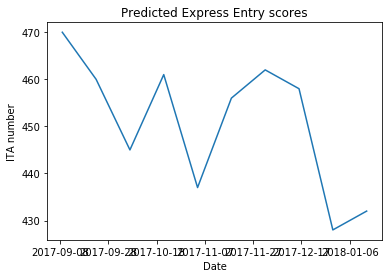